> 

# Project: Investigate a Dataset (NO Show Appointments)

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
- ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
- ‘Neighborhood’ indicates the
location of the hospital.
- ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
- Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?


In [51]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling
>**Gathering Data**: the first step in data wrangling is aquiring data 
> **Assesing Data**: Asses data for cleaning qulaity or tidy issues by using assesing methods is the second step.
> **cleaning Data**: after assesing our data for quality and tidiness issues ,i should prepare data by cleaning these issues that discovered to make it ready for analysis and get conclusions .

### General Properties

In [52]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')


In [53]:
clean_df= df.copy()
# create a copy from data to not change the original data 

In [54]:
clean_df.head() 
# to display the first 5 rows 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [55]:
clean_df.tail()
# to display the last 5 rows from data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [56]:
clean_df.sample(10) 
# need to display random data 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
49199,9.297912e+14,5601893,F,2016-04-19T13:53:45Z,2016-05-11T00:00:00Z,6,JARDIM DA PENHA,0,0,0,0,0,1,No
32063,2.384637e+12,5718210,F,2016-05-19T09:05:21Z,2016-05-19T00:00:00Z,57,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
100226,2.226589e+12,5786747,F,2016-06-08T08:50:35Z,2016-06-08T00:00:00Z,21,SÃO BENEDITO,1,0,0,0,0,0,No
76944,5.518362e+14,5658339,F,2016-05-04T10:57:11Z,2016-05-04T00:00:00Z,46,MARUÍPE,0,0,0,0,0,0,No
99056,8.575966e+11,5739288,F,2016-05-25T13:13:56Z,2016-06-06T00:00:00Z,29,DA PENHA,1,0,0,0,0,1,No
24673,7.254411e+11,5748389,F,2016-05-31T06:53:08Z,2016-05-31T00:00:00Z,47,SANTO ANDRÉ,0,1,0,0,0,0,No
85310,6.378757e+11,5780076,F,2016-06-07T07:34:11Z,2016-06-07T00:00:00Z,60,CARATOÍRA,0,1,0,0,0,0,No
7831,8.189452e+13,5695982,M,2016-05-13T11:20:40Z,2016-05-13T00:00:00Z,35,ROMÃO,0,0,0,0,0,0,No
22272,2.658824e+13,5701943,M,2016-05-16T11:12:50Z,2016-05-18T00:00:00Z,68,DO MOSCOSO,0,1,0,0,0,0,No
52011,7.841637e+12,5552515,F,2016-04-06T16:10:42Z,2016-05-03T00:00:00Z,3,JESUS DE NAZARETH,0,0,0,0,0,1,No


In [57]:
clean_df.info()
# look for NaN  values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [58]:
clean_df.describe()
# to take a look for the spread and range - descriptive stat - 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [59]:
clean_df.Age.sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

In [60]:
clean_df.shape 
# the no of patients and the variables 

(110527, 14)

In [61]:
clean_df[clean_df.PatientId.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [62]:
clean_df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

# cleaning data notes:
### Quality issues for data csv file:
- no-show variable replace '-' with ' _ ' .
- patient id and appointment id should be string.
- correct age variable invalid age -1
- correct Hipertension to Hypertension 
- make all variables lowercase beacuse it is the best option for dot notation

### Tidiness issues for data csv file:
- remove PatientId,	AppointmentID, ScheduledDay,	AppointmentDay



In [63]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
clean_df.rename(columns = lambda x : x.strip().lower().replace("-" , "_"), inplace = True)
clean_df  # Test code

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [64]:
clean_df.rename(columns={'hipertension' : 'hypertension'}, inplace =True)
clean_df['hypertension']

0         1
1         0
2         0
3         0
4         1
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: hypertension, Length: 110527, dtype: int64

In [65]:
clean_df[clean_df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [66]:
clean_df = clean_df.drop(index = 99832, axis = 0)


In [67]:
clean_df[clean_df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


In [68]:
clean_df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [69]:
clean_df.patientid = clean_df.patientid.astype(str)

In [70]:
clean_df.appointmentid = clean_df.appointmentid.astype(str)

In [71]:
clean_df.info() # test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   patientid       110526 non-null  object
 1   appointmentid   110526 non-null  object
 2   gender          110526 non-null  object
 3   scheduledday    110526 non-null  object
 4   appointmentday  110526 non-null  object
 5   age             110526 non-null  int64 
 6   neighbourhood   110526 non-null  object
 7   scholarship     110526 non-null  int64 
 8   hypertension    110526 non-null  int64 
 9   diabetes        110526 non-null  int64 
 10  alcoholism      110526 non-null  int64 
 11  handcap         110526 non-null  int64 
 12  sms_received    110526 non-null  int64 
 13  no_show         110526 non-null  object
dtypes: int64(7), object(7)
memory usage: 12.6+ MB


In [72]:
clean_df.drop(['patientid', 'appointmentid' ,'scheduledday', 'appointmentday'] , axis= 1, inplace= True)


In [73]:
clean_df #test code

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='eda'></a>
## Exploratory Data Analysis

> Now data ready for analysis to conclude insights and implement visualization 

### Histogram for all dataset

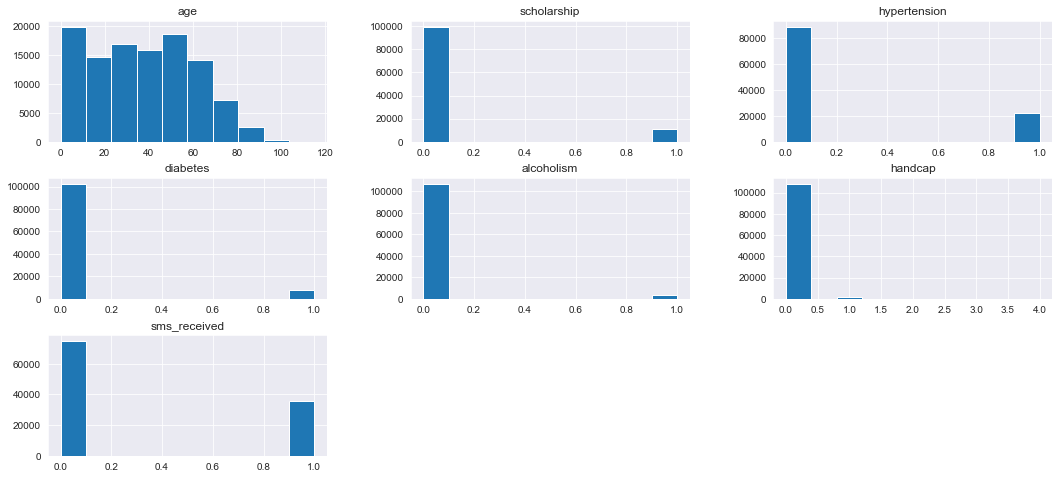

In [74]:
clean_df.hist(figsize=(18,8));

  **Display Histogram for all variables for No show appointment analysis**


In [75]:

show = clean_df.no_show == " No"  # in no_show variable 'no ' means that the patient attend 
notshow = clean_df.no_show == " Yes" # it means that the patient not attend 


In [76]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
show ,notshow

(0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 110522    False
 110523    False
 110524    False
 110525    False
 110526    False
 Name: no_show, Length: 110526, dtype: bool,
 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 110522    False
 110523    False
 110524    False
 110525    False
 110526    False
 Name: no_show, Length: 110526, dtype: bool)

### Research Question 1  (Does sms received affect the attendance of patients?  )

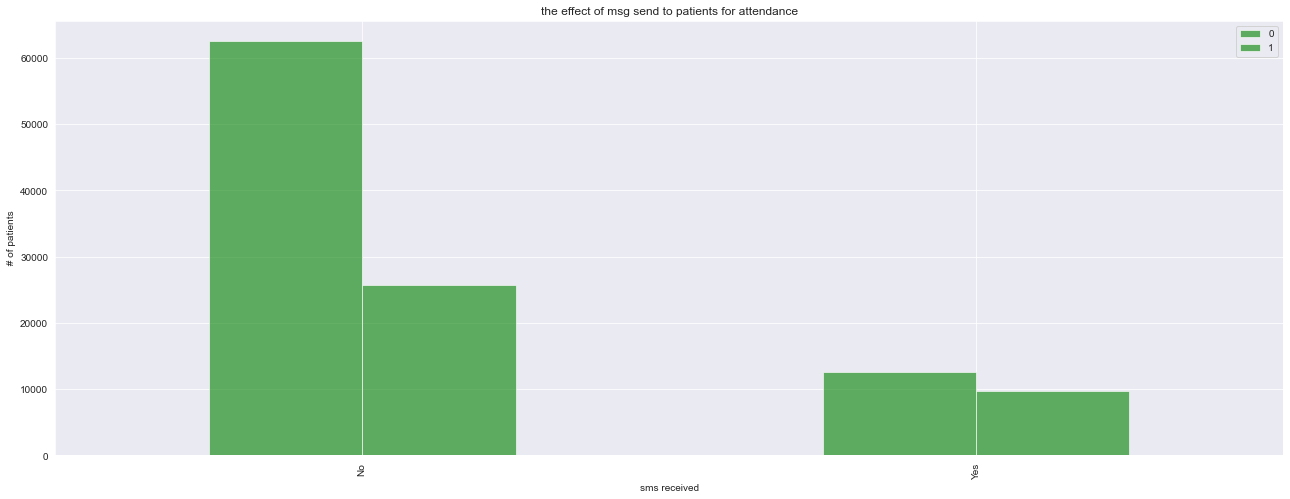

In [77]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
clean_df.groupby('no_show')['sms_received'].value_counts().unstack().plot(kind = 'bar' ,figsize = (22,8), alpha = .6 , color = 'green')
#clean_df.sms_received[notshow].plot(kind = 'bar',figsize = (22,8), alpha = .6,  color = 'red',label = 'notshow')
plt.legend()
plt.title('the effect of msg send to patients for attendance')
plt.xlabel('sms received')
plt.ylabel(' # of patients');

**Display the effect of sms received on the no. of attendance**


In [78]:
clean_df.groupby('no_show')['sms_received'].value_counts()

no_show  sms_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: sms_received, dtype: int64

### Research Question 2  (Does age affect the attendance of patients?  )


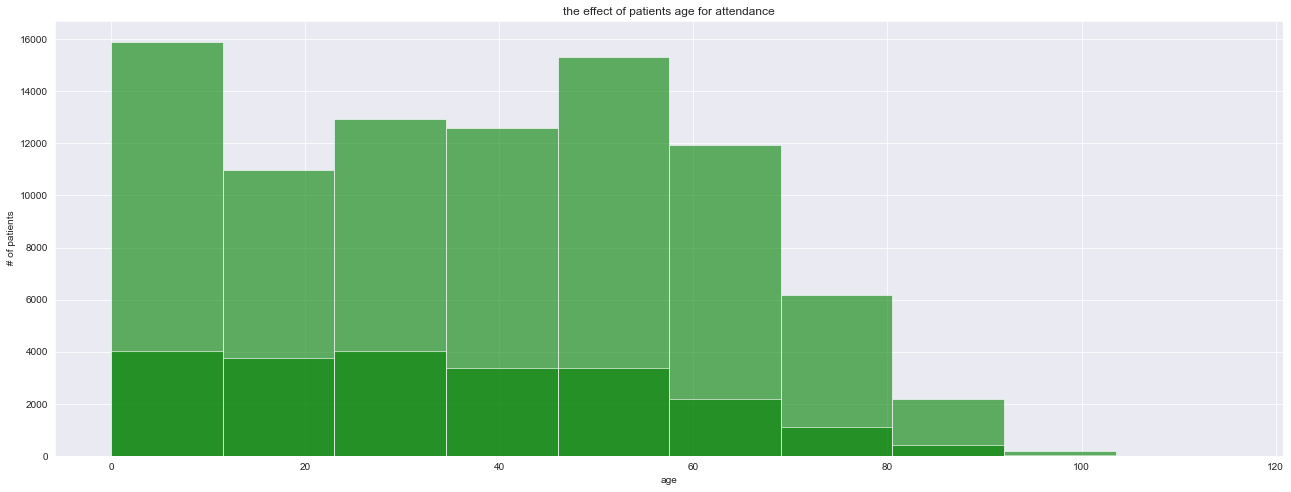

In [83]:
# clean_df.groupby('no_show').age.hist(figsize = (22,8), alpha = .6, color = 'green')
# #clean_df.age[no_show].plot(kind='hist',figsize = (19,4), alpha = .6, color = 'red',label = 'notshow')

# plt.title('the effect of patients age for attendance')
# plt.xlabel('age')
# plt.ylabel(' # of patients');

def appointment(df, variable , attend):
    df.groupby(attend)[variable].hist(figsize = (22,8), alpha = .6, color = 'green')
    plt.title('the effect of patients age for attendance')
    plt.xlabel('age')
    plt.ylabel(' # of patients');
appointment(clean_df, 'age' , 'no_show')
    
    

**Display if ages effect on patients absence or not.**


### Research Question 3  (Does gender affect the attendance of patients?  )


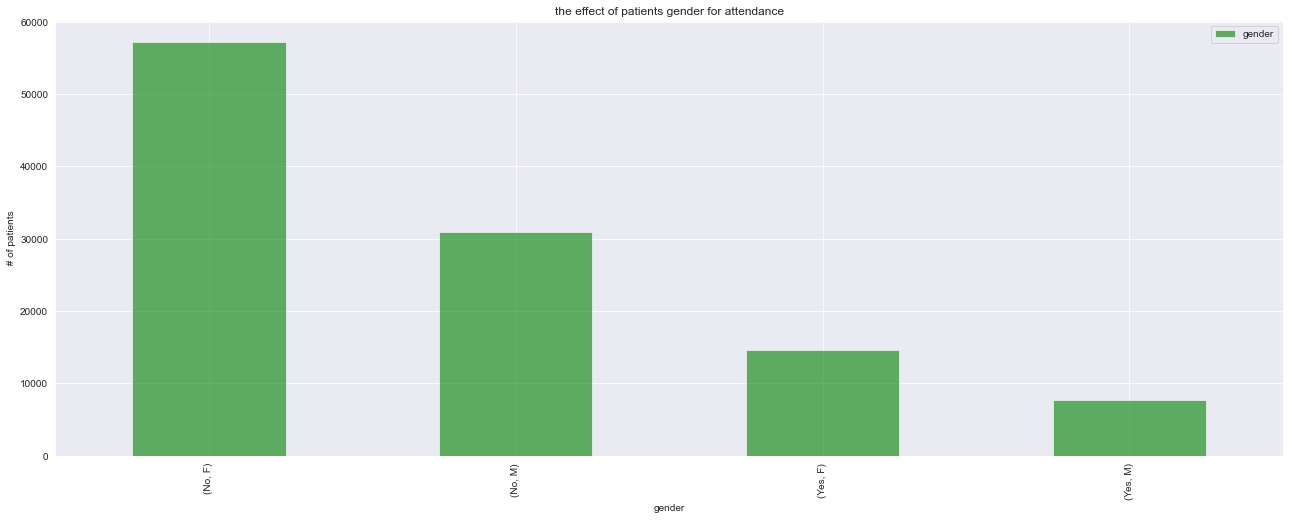

In [30]:
clean_df.groupby('no_show').gender.value_counts().plot(kind = 'bar',figsize = (22,8), alpha = .6, color = 'green')
plt.legend()
plt.title('the effect of patients gender for attendance')
plt.xlabel('gender')
plt.ylabel(' # of patients');

**Display if no-show appointments associated with a certain gender**

### Research Question 4  (Do[ 'hypertension','diabetes','alcoholism' ]affect the attendance of patients?  )


C:\Users\Pc\AppData\Local\Temp/ipykernel_12712/53945901.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clean_df.groupby('no_show')['hypertension','diabetes','alcoholism'].count().plot(kind = 'bar',figsize = (22,8), alpha = .6, color = 'green')


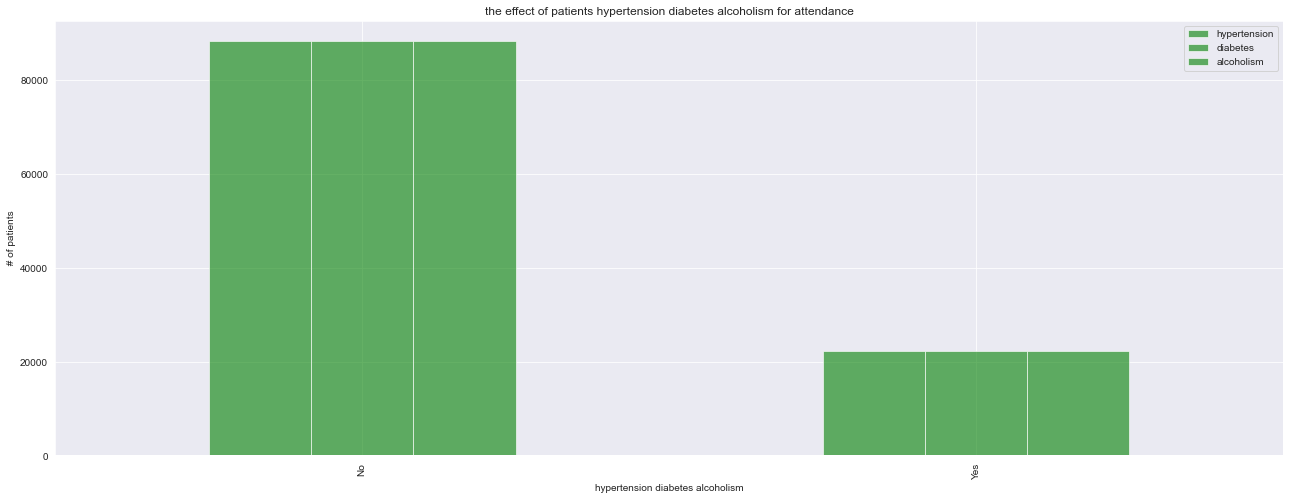

In [31]:
clean_df.groupby('no_show')['hypertension','diabetes','alcoholism'].count().plot(kind = 'bar',figsize = (22,8), alpha = .6, color = 'green')
plt.legend()
plt.title('the effect of patients hypertension diabetes alcoholism for attendance')
plt.xlabel('hypertension diabetes alcoholism')
plt.ylabel(' # of patients');

**Display if chronic illnesses like hypertension and diabetes affecting patient's absences and alcoholism**


## Conclusion For NO Show Appointments Dataset :
- I found that sms sent to patients : patients who attend and did not receive message is more than the patient who not attend and receive sms.
- effect of age due to attendance of patients : i found that patient form age o to 10 and from 50 to 60 have the highest attendance between other brackets.
- effect of gender due to attendance of patients : i found that female patients who attend more than males patients.
- effect of hypertension','diabetes','alcoholism due to attendance of patients : hypertension','diabetes','alcoholism has a high effect on attendance of patients .


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295